In [3]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv
import matplotlib.pyplot as plt
from IPython import display

In [4]:
env = GridworldEnv()

In [84]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # complexity -> O(m*n*n)
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    num_iter = 0
    plt.ion()
    while True:
        new_V = np.zeros(env.nS)
        for state in range(env.nS):
            for action in range(env.nA):
                t_tuples = env.P[state][action] 
                val = t_tuples[0][2]
                for transition in t_tuples:
                    val += discount_factor * transition[0] * V[transition[1]]
                new_V[state] += policy[state][action] * val
        
        if np.all(np.abs(new_V - V) < theta):
            break
        
        num_iter += 1
        if num_iter <= 7:
            plt.imshow(V.reshape(4, 4))
            plt.title(f'Iteration {num_iter}')
            display.clear_output(wait=True)
            display.display(plt.show())
            time.sleep(1.0)                  
        
        V = new_V
    
    plt.imshow(V.reshape(4, 4))
    plt.title('Final Iteration')
    plt.show()           
    
    return np.array(V)

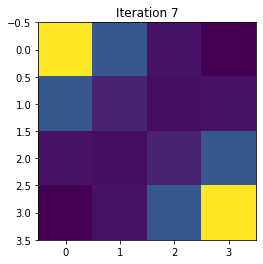

None

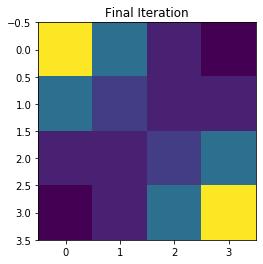

In [85]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(random_policy, env)

In [65]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)